<h1>Current Plot<h1>

<h3>Import<h3>

In [73]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m
import statistics as stat

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
sns.set_theme()


<h3>Plot<h3>

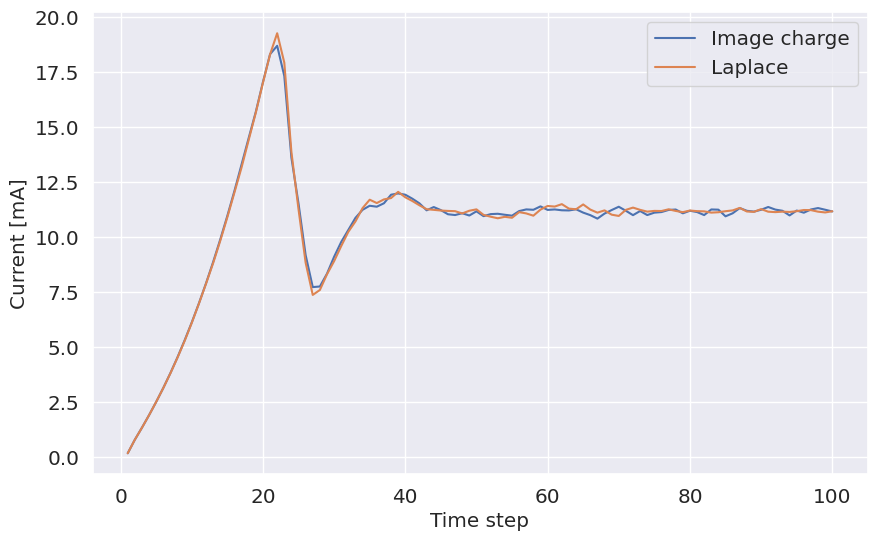

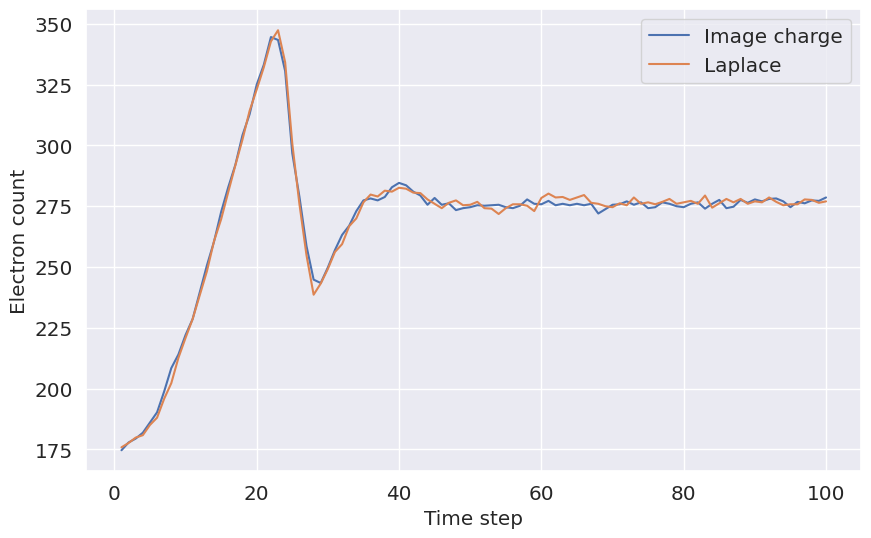

In [74]:
time_steps = np.arange(1, 101, 1)
ic_cur = np.zeros(100); ic_elec = np.zeros(100)
lp_cur = np.zeros(100); lp_elec = np.zeros(100)
nr_samples=5

for i in range(nr_samples):
    ic_filename = f'./IC/V150_D10_{i+1}/out/ramo_current.dt'
    ic_data = pd.read_csv(filepath_or_buffer=ic_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
    ic_cur += ic_data['current'].values
    ic_elec += ic_data['nrElec'].values
    
    ic_filename = f'./LP/V150_D10_{i+1}/out/ramo_current.dt'
    lp_data = pd.read_csv(filepath_or_buffer=ic_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
    lp_cur += lp_data['current'].values
    lp_elec += lp_data['nrElec'].values

ic_cur /= nr_samples
ic_elec /= nr_samples
lp_cur /= nr_samples
lp_elec /= nr_samples
    
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_steps,ic_cur*1e3, label='Image charge')
ax.plot(time_steps,lp_cur*1e3, label='Laplace')
ax.set_xlabel('Time step', size='large')
ax.set_ylabel('Current [mA]', size='large')
ax.tick_params(axis='both', labelsize='large')
ax.legend(fontsize='large')
# ax.set_title('Current over time step with Laplace and image charge method', size='large')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_steps,ic_elec, label='Image charge')
ax.plot(time_steps,lp_elec, label='Laplace')
ax.set_xlabel('Time step', size='large')
ax.set_ylabel('Electron count', size='large')
ax.tick_params(axis='both', labelsize='large')
ax.legend(fontsize='large')
# ax.set_title('Electron count over time step with Laplace and image charge method', size='large')
plt.show()


In [75]:
# Root mean square error
rmse_current = np.sqrt(np.mean((ic_cur - lp_cur)**2))
rmse_elec = np.sqrt(np.mean((ic_elec - lp_elec)**2))
print(f'RMSE of current: {1e3*rmse_current:.2e} mA')
print(f'RMSE of electron count: {rmse_elec:.2e} ')

# Root mean square error between image charge 1 and 2
ic_filename_1 = f'./IC/V150_D10_1/out/ramo_current.dt'
ic_filename_2 = f'./IC/V150_D10_2/out/ramo_current.dt'
ic_data_1 = pd.read_csv(filepath_or_buffer=ic_filename_1, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
ic_data_2 = pd.read_csv(filepath_or_buffer=ic_filename_2, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
ic_cur_1 = ic_data_1['current'].values
ic_cur_2 = ic_data_2['current'].values
ic_elec_1 = ic_data_1['nrElec'].values
ic_elec_2 = ic_data_2['nrElec'].values
rmse_current_1 = np.sqrt(np.mean((ic_cur_1 - ic_cur_2)**2))
rmse_elec_1 = np.sqrt(np.mean((ic_elec_1 - ic_elec_2)**2))
print(f'RMSE of current between IC 1 and 2: {1e3*rmse_current_1:.2e} mA')
print(f'RMSE of electron count between IC 1 and 2: {rmse_elec_1:.2e} ')

# Root mean square error between Laplace 1 and 2
lp_filename_1 = f'./LP/V150_D10_1/out/ramo_current.dt'
lp_filename_2 = f'./LP/V150_D10_2/out/ramo_current.dt'
lp_data_1 = pd.read_csv(filepath_or_buffer=lp_filename_1, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
lp_data_2 = pd.read_csv(filepath_or_buffer=lp_filename_2, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
lp_cur_1 = lp_data_1['current'].values
lp_cur_2 = lp_data_2['current'].values
lp_elec_1 = lp_data_1['nrElec'].values
lp_elec_2 = lp_data_2['nrElec'].values
rmse_current_2 = np.sqrt(np.mean((lp_cur_1 - lp_cur_2)**2))
rmse_elec_2 = np.sqrt(np.mean((lp_elec_1 - lp_elec_2)**2))
print(f'RMSE of current between LP 1 and 2: {1e3*rmse_current_2:.2e} mA')
print(f'RMSE of electron count between LP 1 and 2: {rmse_elec_2:.2e} ')

RMSE of current: 1.70e-01 mA
RMSE of electron count: 2.22e+00 
RMSE of current between IC 1 and 2: 4.21e-01 mA
RMSE of electron count between IC 1 and 2: 5.13e+00 
RMSE of current between LP 1 and 2: 3.39e-01 mA
RMSE of electron count between LP 1 and 2: 4.20e+00 


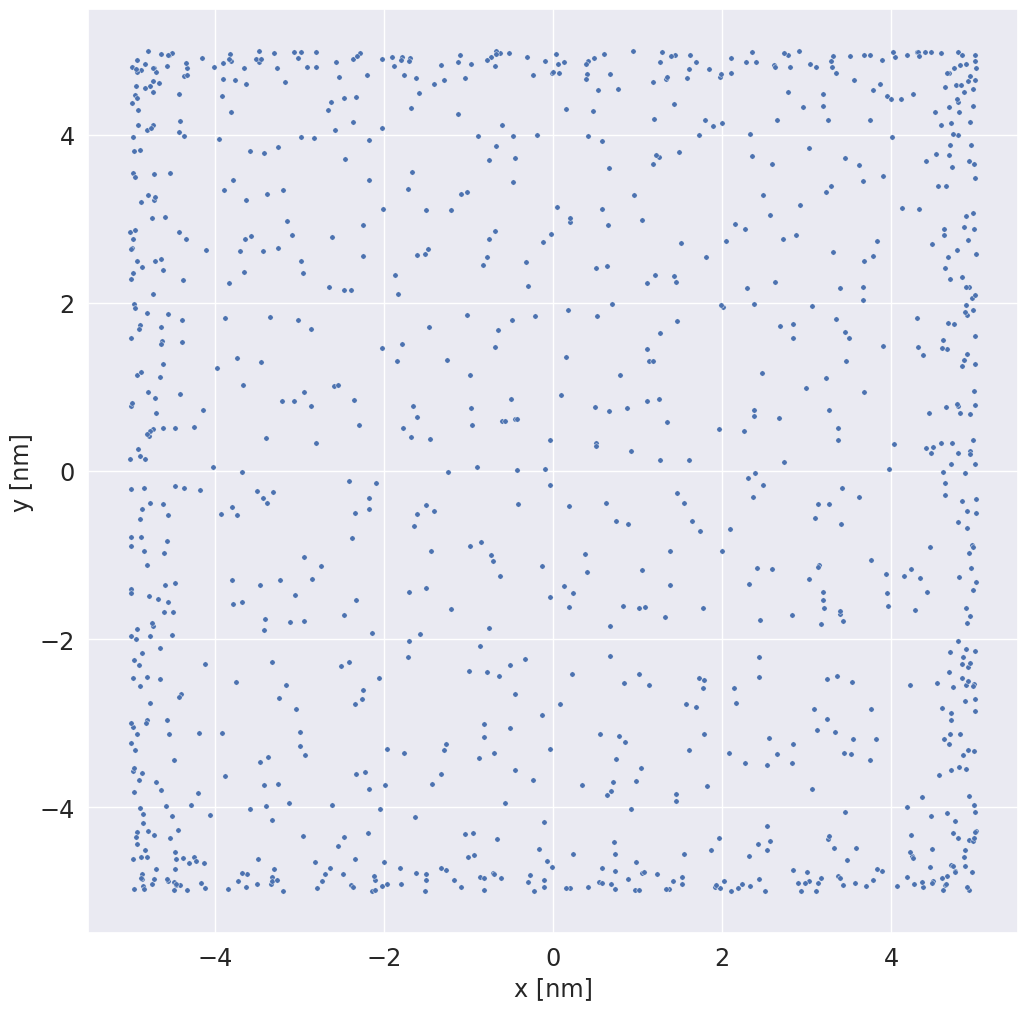

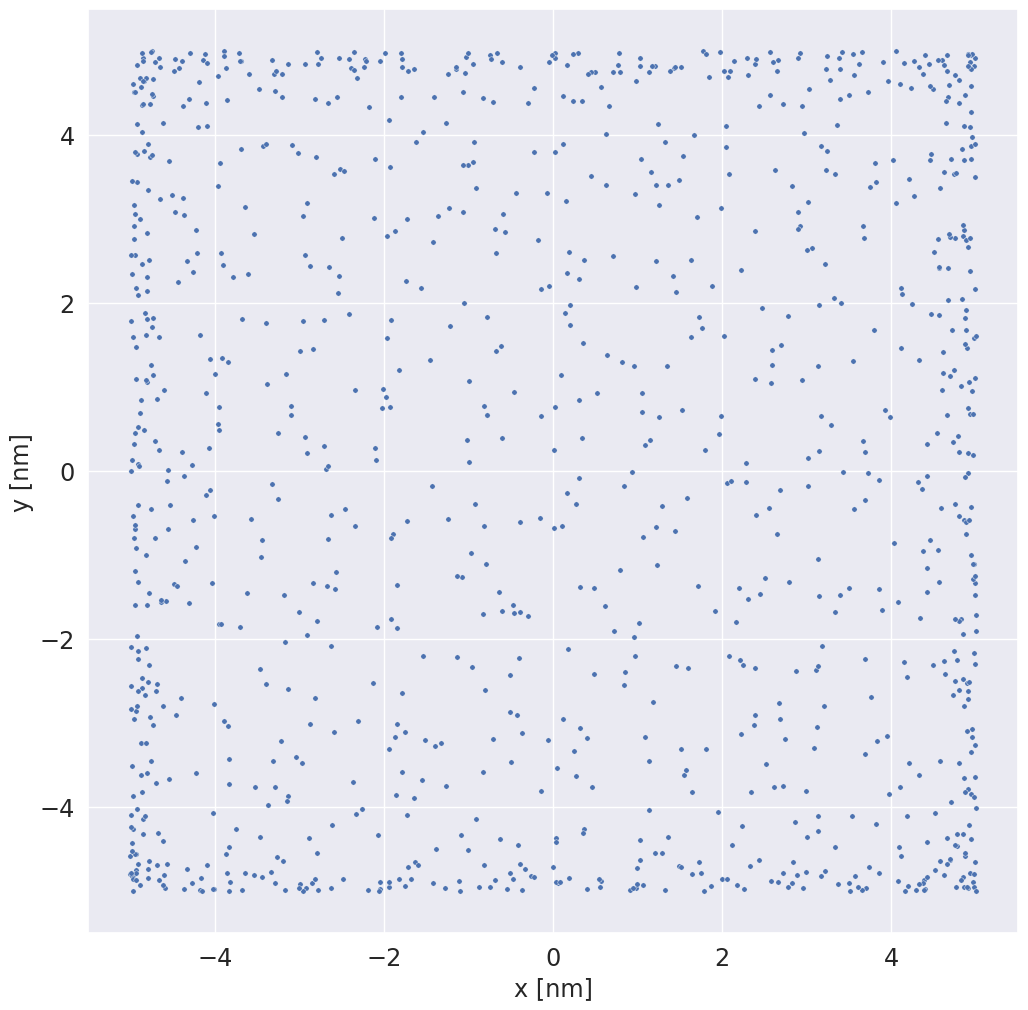

In [76]:
# Emission density
dt_emit_type = np.dtype([('x', np.float64), ('y', np.float64), ('z', np.float64), ('emit', np.int64), ('nr', np.int64)])

ic_filename = './IC/V150_D10_1/out/density_emit_elec.bin'
ic_data_mem_emit = np.memmap(ic_filename, dtype=dt_emit_type, mode='r', order='F')   
ic_emit = pd.DataFrame.from_records(data=ic_data_mem_emit, columns=ic_data_mem_emit.dtype.names)
    
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=ic_emit, x="x", y="y", s=15, ax=ax)
# ax.set_title('Emission density - Image charge', size='x-large')
ax.set_xlabel('x [nm]', size='x-large')
ax.set_ylabel('y [nm]', size='x-large')
ax.tick_params(axis='both', labelsize='x-large')
plt.show()


lp_filename = './LP/V150_D10_1/out/density_emit_elec.bin'
lp_data_mem_emit = np.memmap(lp_filename, dtype=dt_emit_type, mode='r', order='F')   
lp_emit = pd.DataFrame.from_records(data=lp_data_mem_emit, columns=lp_data_mem_emit.dtype.names)

fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=lp_emit, x="x", y="y", s=15, ax=ax)
# ax.set_title('Emission density - Laplace', size='x-large')
ax.set_xlabel('x [nm]', size='x-large')
ax.set_ylabel('y [nm]', size='x-large')
ax.tick_params(axis='both', labelsize='x-large')
plt.show()